### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi
!rm -rf /content/*


/bin/bash: line 1: nvidia-smi: command not found


**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

## Install YOLO11 via Ultralytics

In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.


Custom TB Handler failed, unregistering


## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("poolsearch2024").project("pool_searching")
version = project.version(3)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pool_searching-3 in yolov11:: 100%|██████████| 12776/12776 [00:02<00:00, 6115.30it/s]


## Custom Training

In [ ]:
# Przejście do katalogu domowego
%cd {HOME}

# Trenowanie modelu YOLO z ulepszonymi parametrami
!yolo task=detect \
  mode=train \
  model=yolo11s.pt \
  data={dataset.location}/data.yaml \
  epochs=100 \
  imgsz=640 \
  batch=16 \
  lr0=0.001 \
  optimizer='AdamW' \
  warmup_epochs=3 \
  hsv_h=0.015 \
  hsv_s=0.7 \
  hsv_v=0.4 \
  degrees=10.0 \
  translate=0.1 \
  scale=0.5 \
  fliplr=0.5 \
  flipud=0.3 \
  mosaic=1.0 \
  mixup=0.1 \
  copy_paste=0.1 \
  plots=True

# Eksportowanie wytrenowanego modelu na Dysk Google
from google.colab import drive
import os
import torch

# Ścieżka do wytrenowanego modelu w formacie .pt
model_path = f"{HOME}/runs/detect/train/weights/best.pt"


**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					     R_curve.png	   val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	   val_batch0_pred.jpg
confusion_matrix.png				     results.png	   val_batch1_labels.jpg
events.out.tfevents.1737551876.de8da4597623.28193.0  train_batch0.jpg	   val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	   val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch25200.jpg  val_batch2_pred.jpg
labels.jpg					     train_batch25201.jpg  weights
P_curve.png					     train_batch25202.jpg
PR_curve.png					     train_batch2.jpg


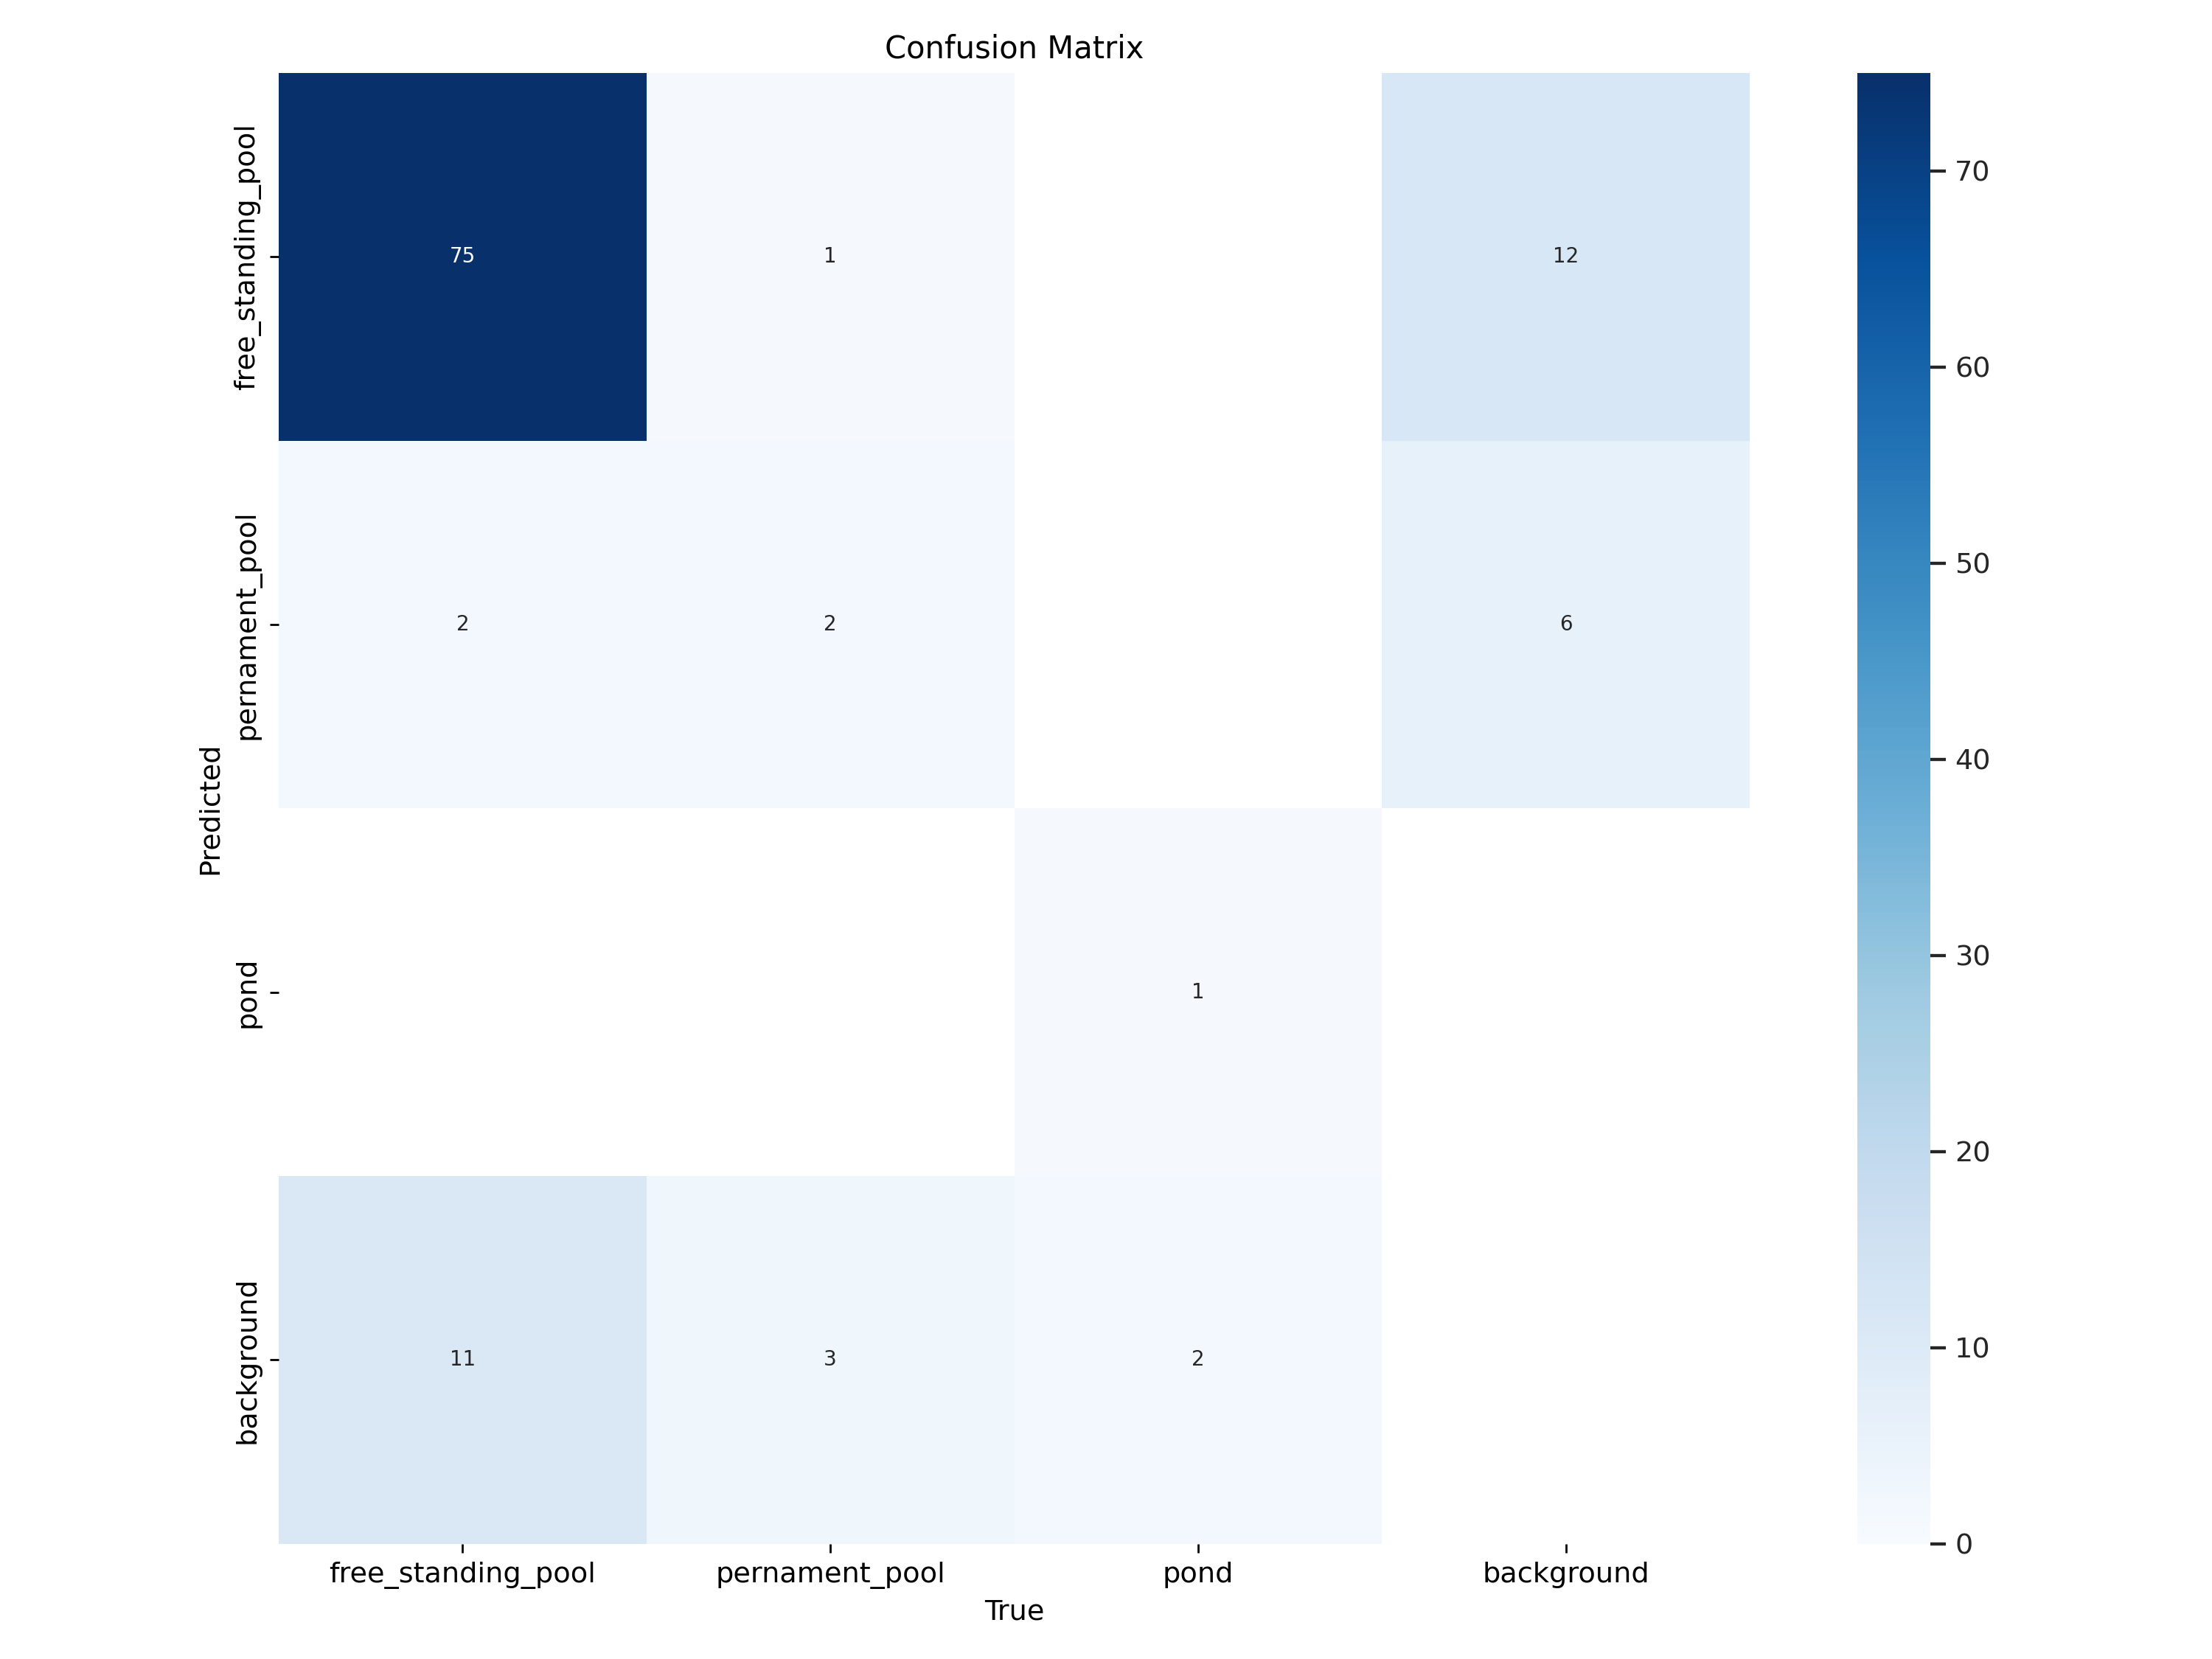

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

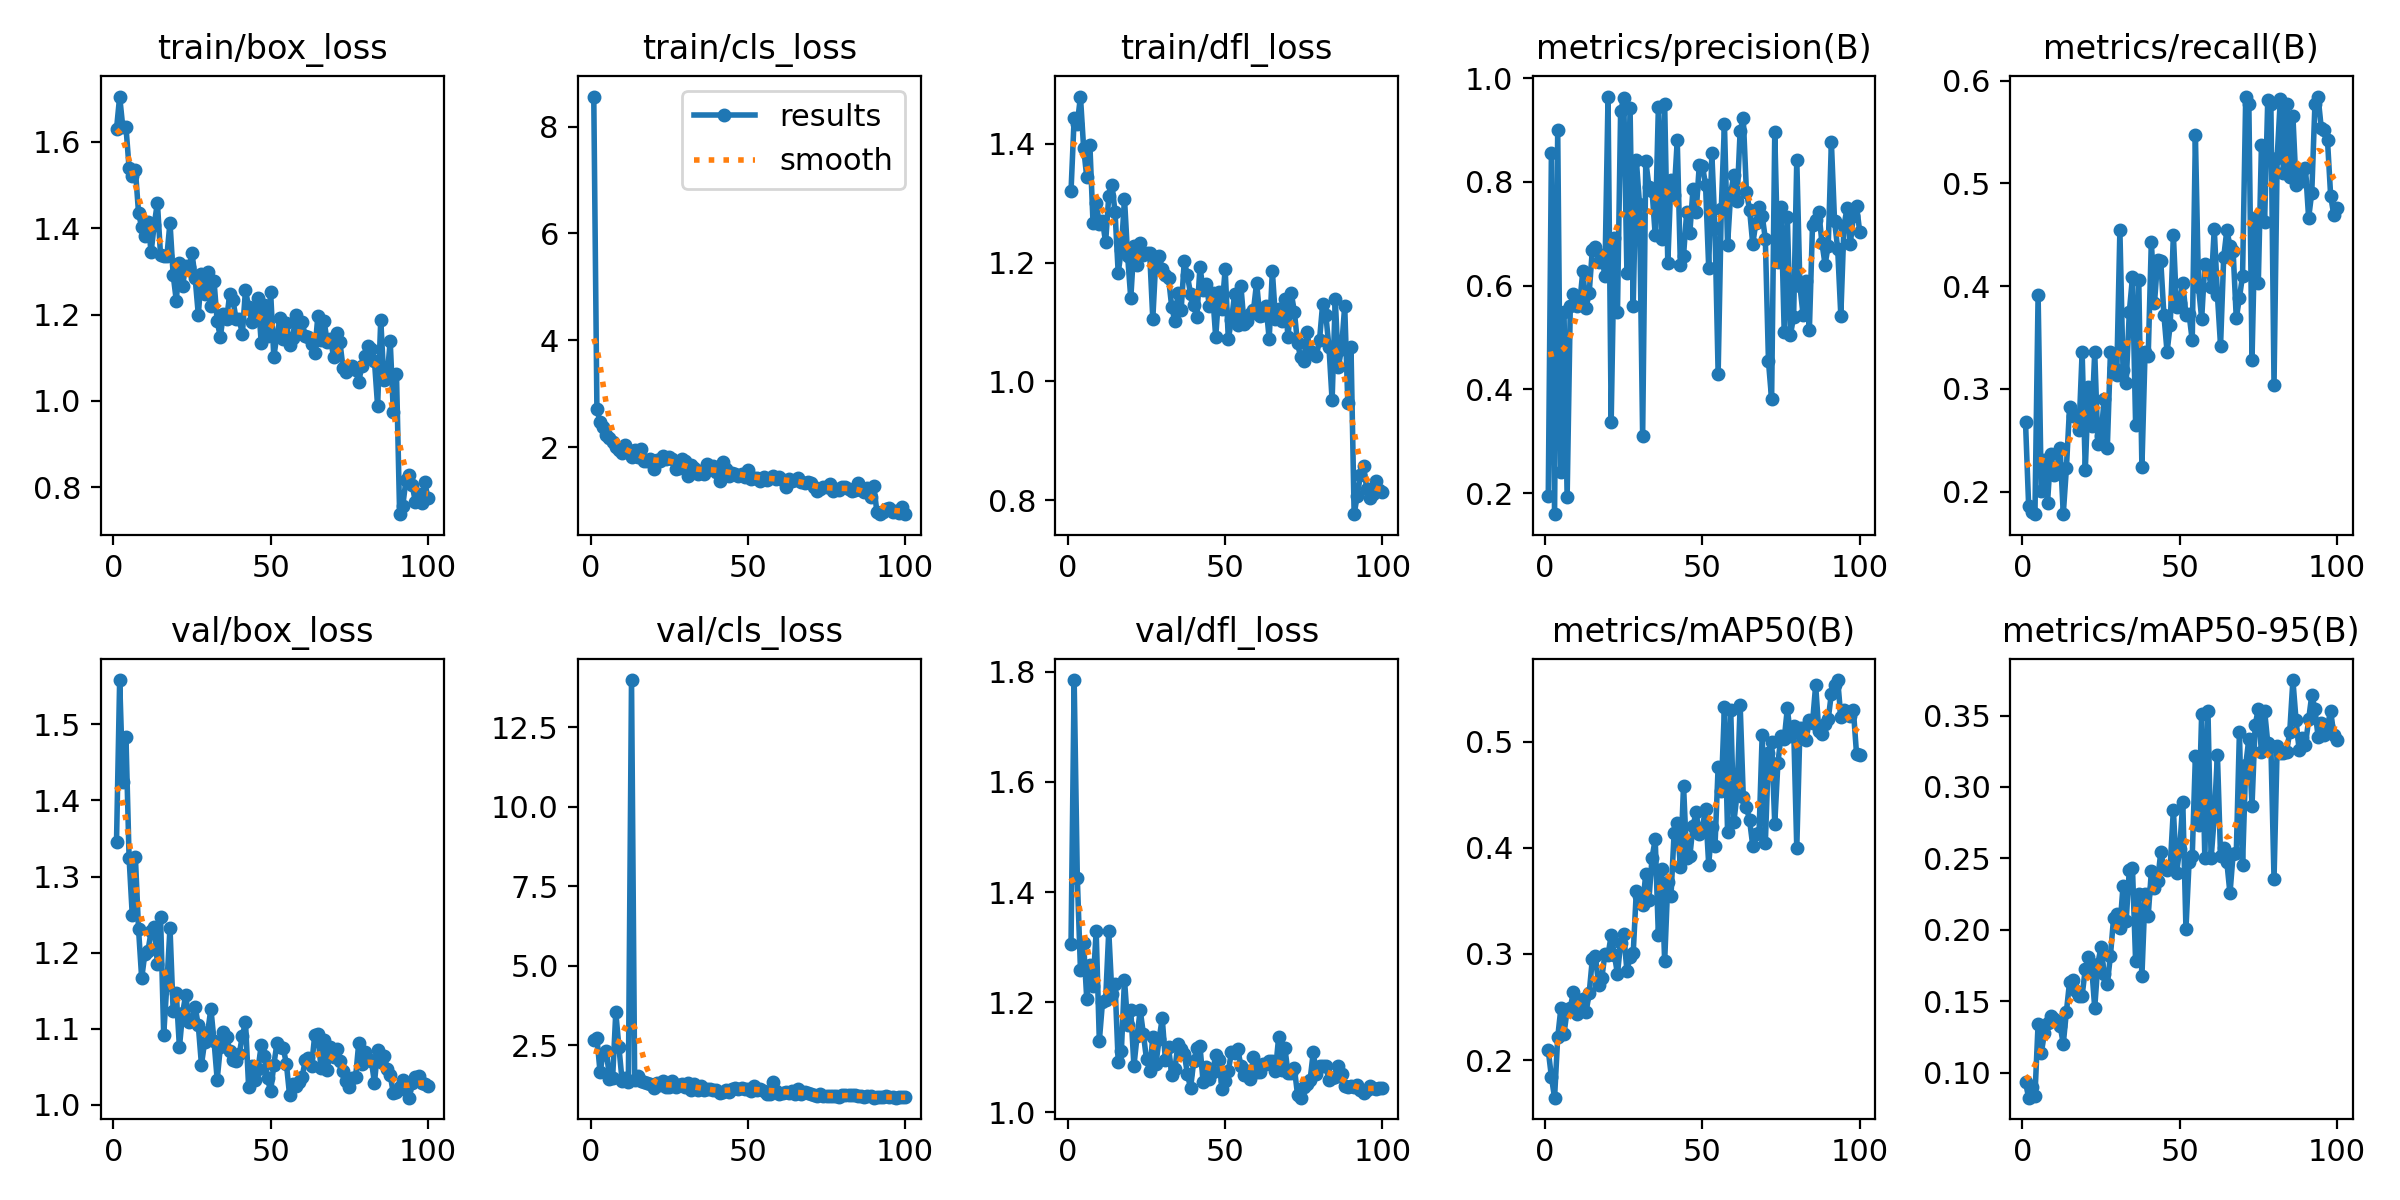

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

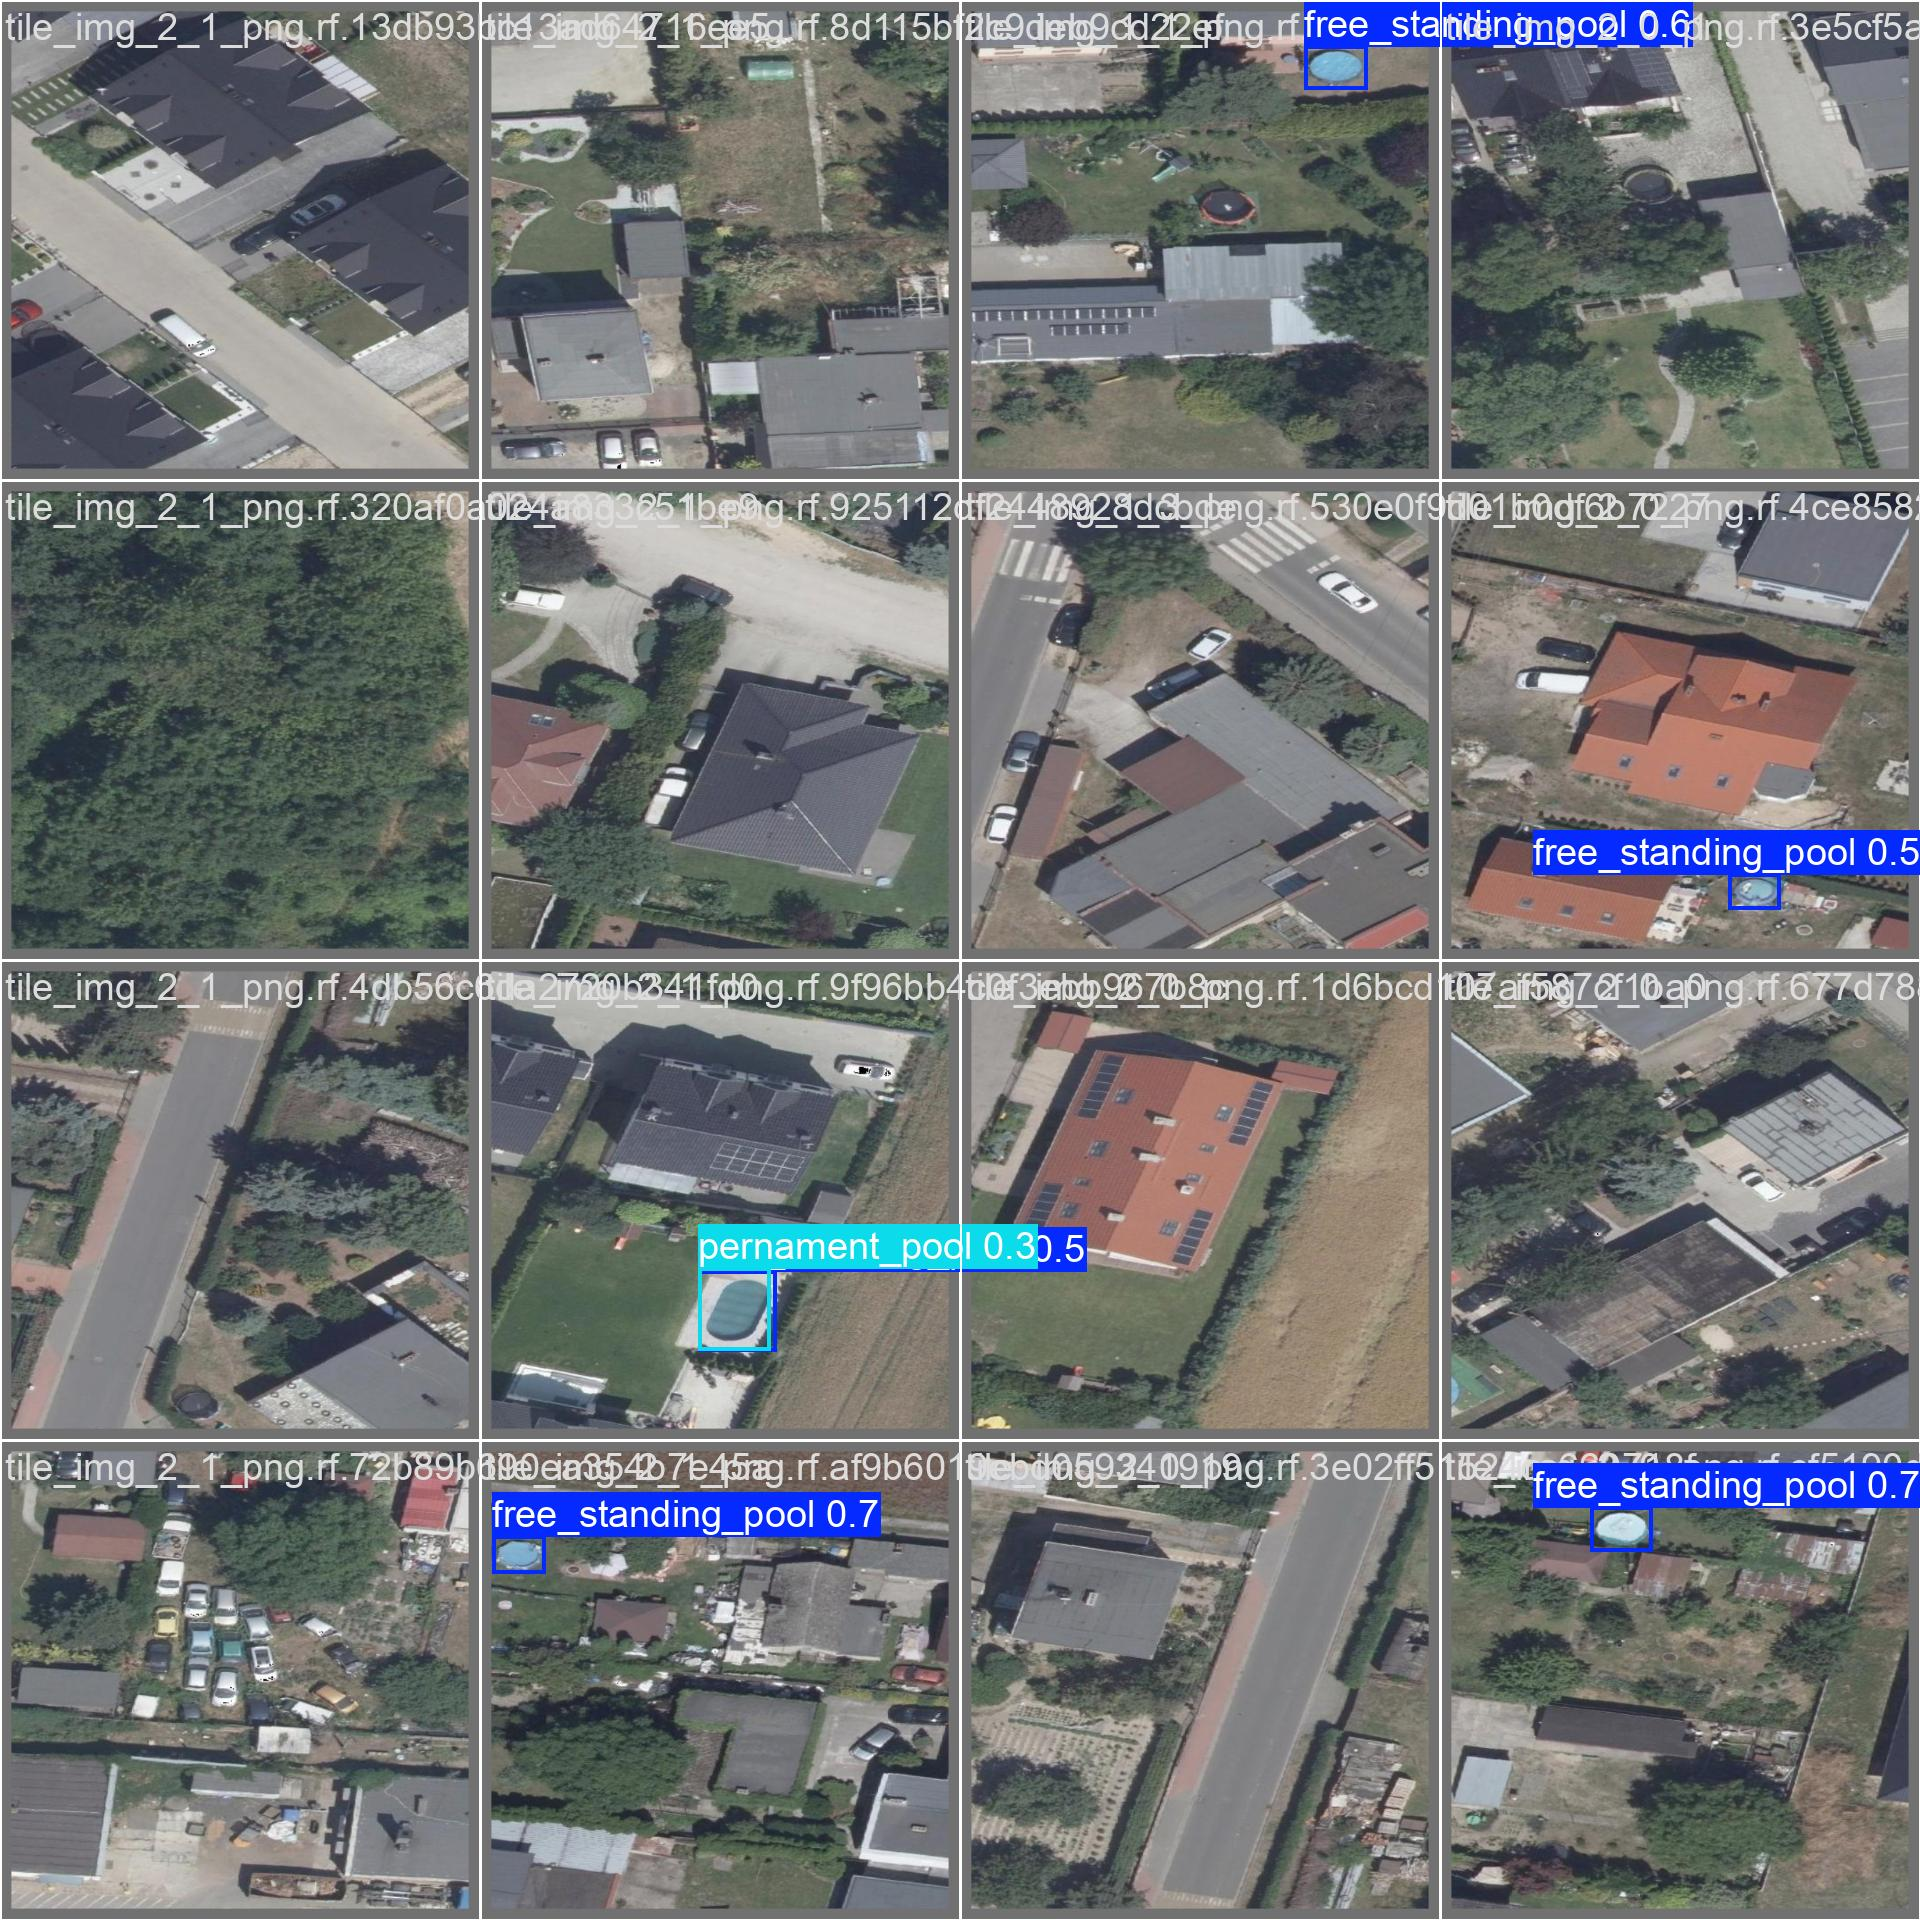

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Pool_searching-3/valid/labels.cache... 1277 images, 1189 backgrounds, 0 corrupt: 100% 1277/1277 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 80/80 [00:15<00:00,  5.29it/s]
                   all       1277         97      0.727      0.566      0.553      0.374
    free_standing_pool         79         88      0.894      0.864      0.916      0.532
        pernament_pool          6          6      0.372        0.5      0.406      0.254
                  pond          3          3      0.913      0.333      0.337      0.337
Speed: 0.4ms preprocess, 9.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

image 1/638 /content/datasets/Pool_searching-3/test/images/tile_img_0_0_png.rf.2c879007e19b5de62b0581ea3b839268.jpg: 640x640 (no detections), 17.5ms
image 2/638 /content/datasets/Pool_searching-3/test/images/tile_img_0_0_png.rf.4c79b06e7384b40823fca527b845fd00.jpg: 640x640 (no detections), 15.6ms
image 3/638 /content/datasets/Pool_searching-3/test/images/tile_img_0_0_png.rf.7a7d518d4a3d5373b08059718481d607.jpg: 640x640 (no detections), 15.6ms
image 4/638 /content/datasets/Pool_searching-3/test/images/tile_img_0_0_png.rf.95ae49cae83c9b0c963eaf66ee691133.jpg: 640x640 (no detections), 15.6ms
image 5/638 /content/datasets/Pool_searching-3/test/images/tile_img_0_0_png.rf.9e8fa79c58934cfee76086d3389d18f6.jpg: 640x640 1 free_standing_pool, 15.5ms
image 6/638 /content/datasets/Pool_searching-3/test/images/tile_img_0_0_png.rf.a0d1

**NOTE:** Let's take a look at few results.

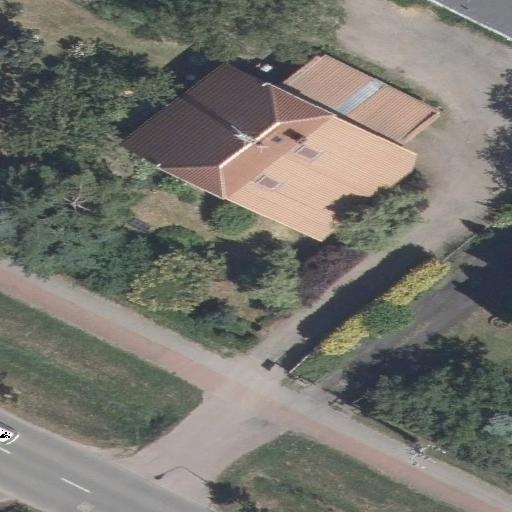

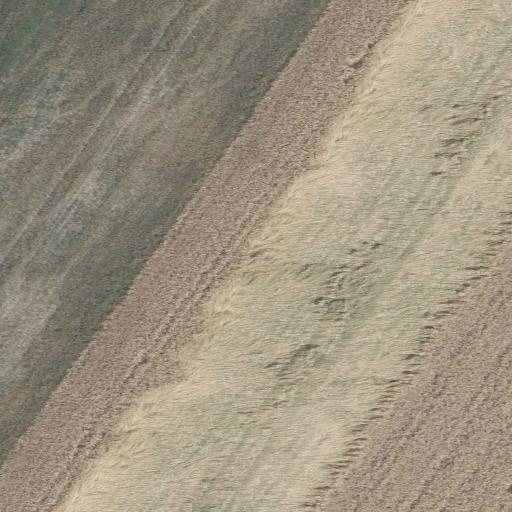

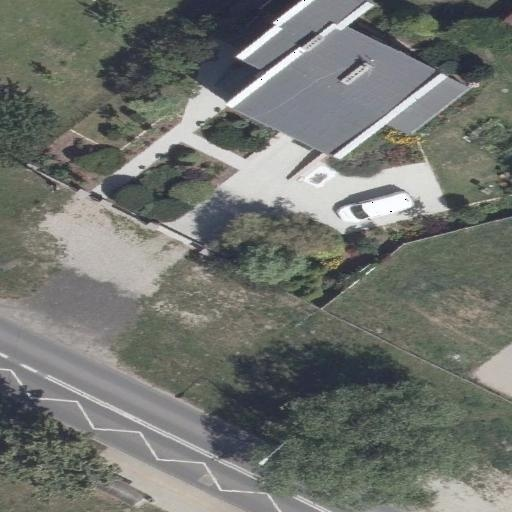

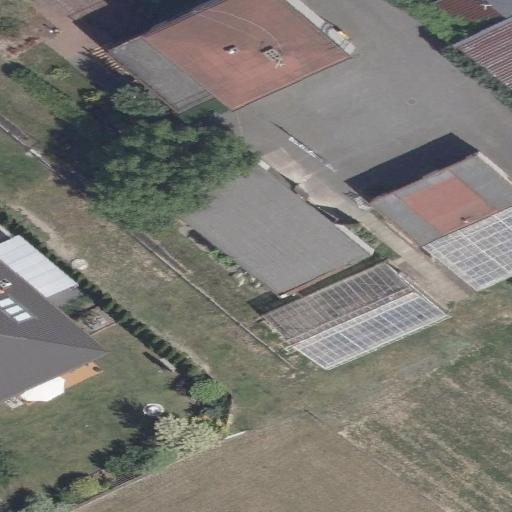

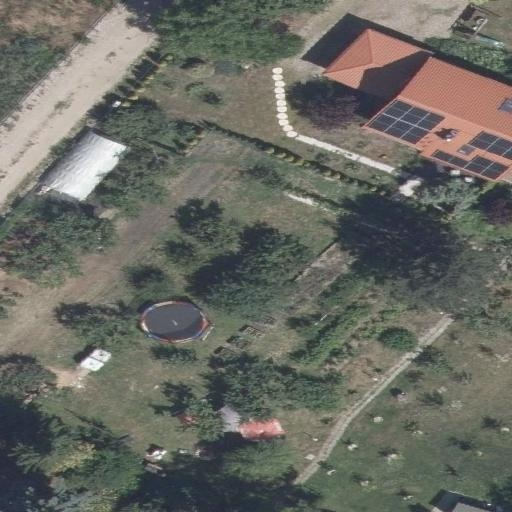

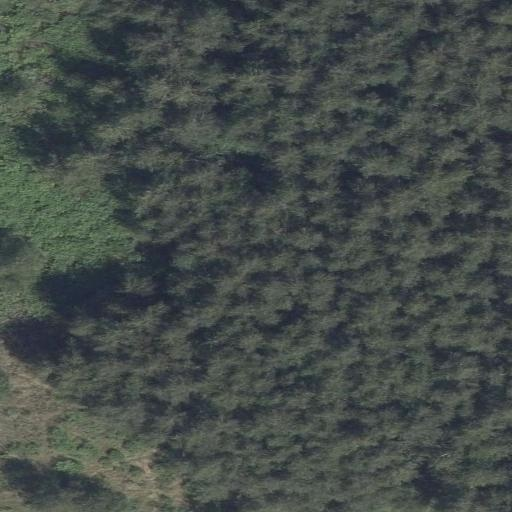

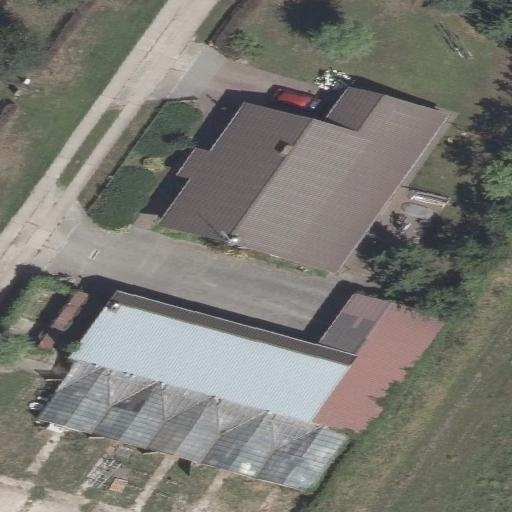

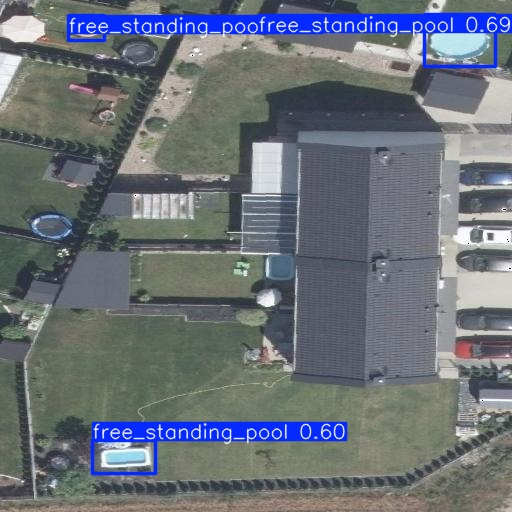

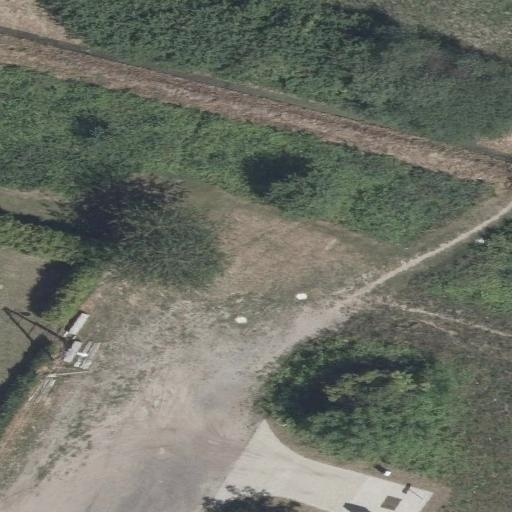

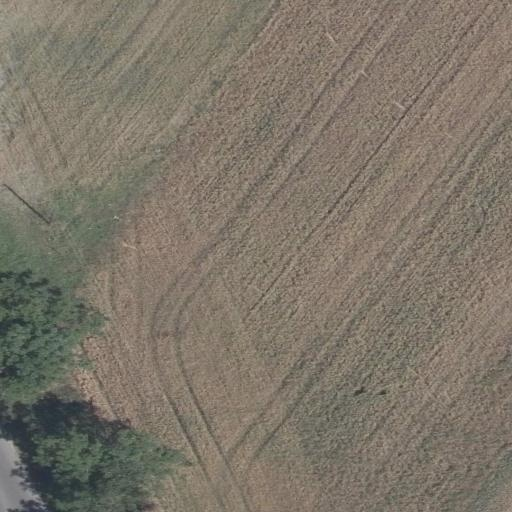

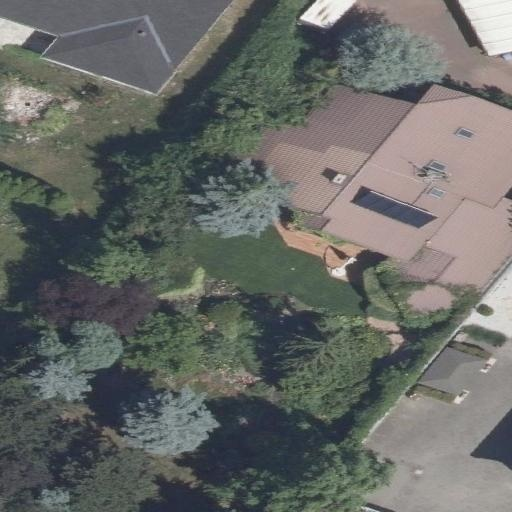

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:11]:
    display(IPyImage(filename=img, width=600))
    print("\n")